In [2]:
import numpy as np
import imageio
import cv2
import matplotlib.pyplot as plt
import glob

# BEE DETECT

In [3]:
# Load all images from TRAIN
train_imgs = np.array([np.array(imageio.imread(filename)) for filename in glob.glob('../TRAIN/*.jpg')])

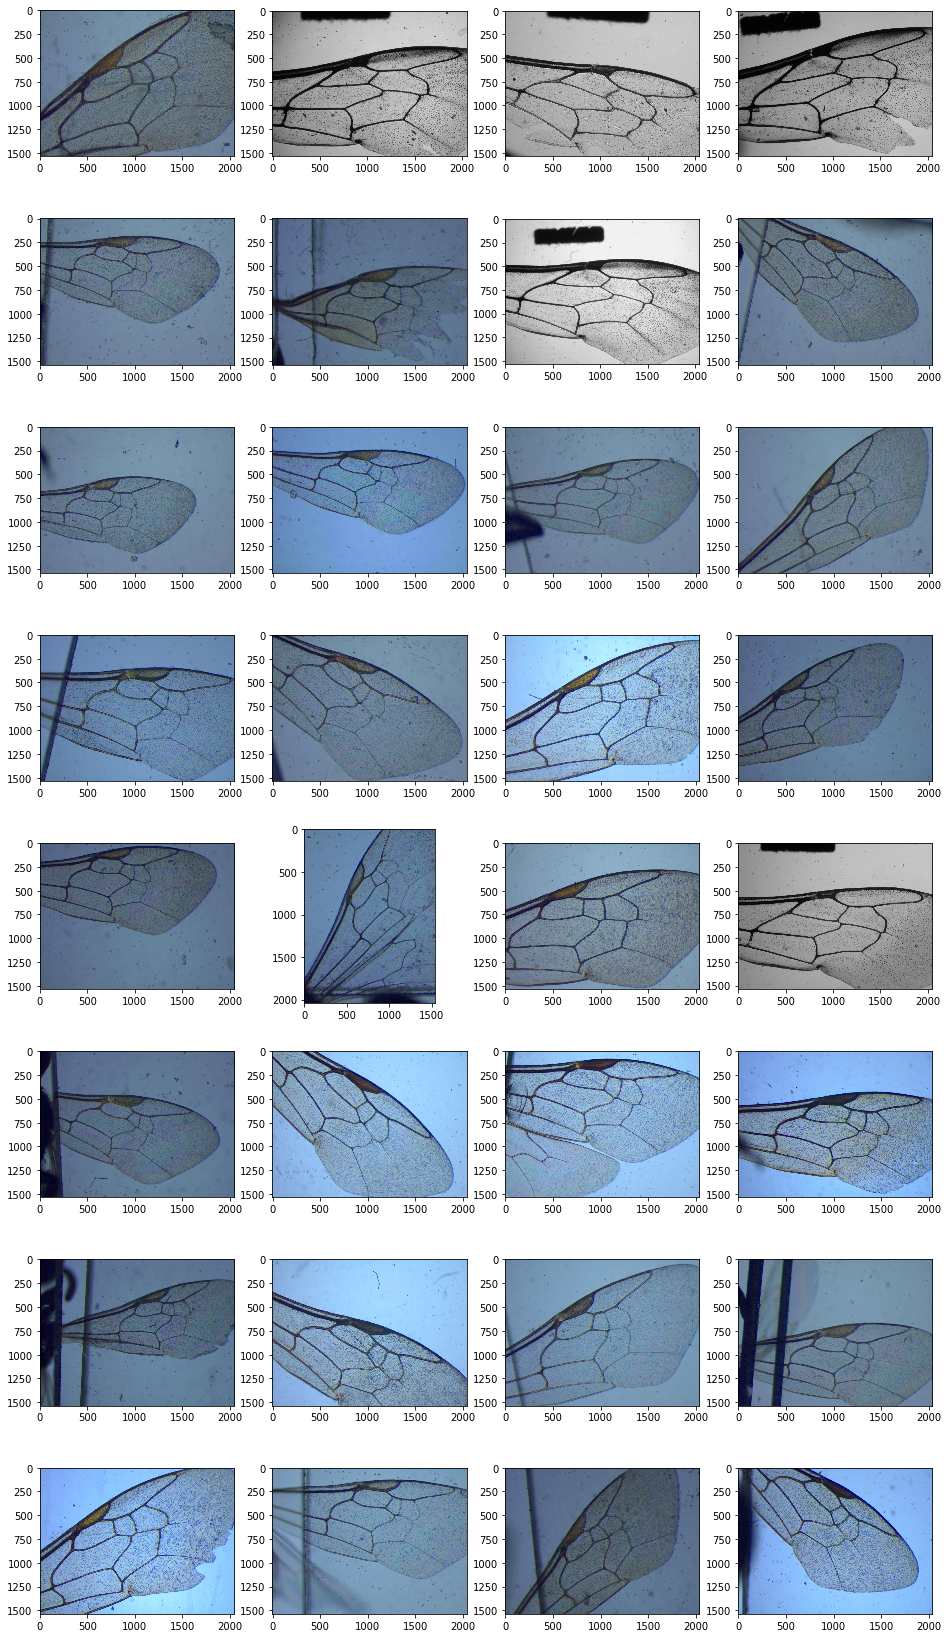

In [4]:
# Print all images from TRAIN
fig=plt.figure(figsize=(16, 30))
for i, img in enumerate(train_imgs):
    fig.add_subplot(8, 4, i+1)
    plt.imshow(img)
plt.show()

In [5]:
# Load one image and CSV from TEST
test_img = imageio.imread('../TEST/01_inf.jpg')
test_point = np.genfromtxt('../TEST/01_inf.csv', delimiter=',')

In [6]:
# Draw points from CSV on the image
def draw_points(img, points):
    img_copy = img.copy()
    for point in points:
        cv2.circle(img_copy,(int(point[1]), int(point[0])), 20, (255,255,0), -1)
    return img_copy

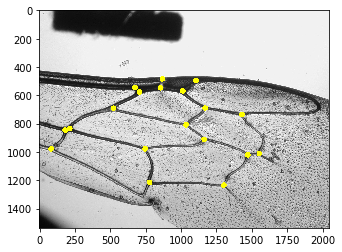

In [7]:
plt.imshow(draw_points(test_img, test_point))

## Threshold the image

In [182]:
img = train_imgs[0].copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,179,28)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

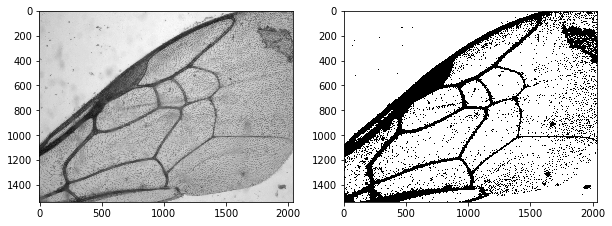

In [183]:
fig=plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')

plt.show()

## Noise Removal

In [184]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

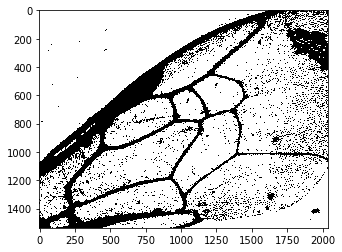

In [190]:
plt.imshow(opening, cmap='gray')

## Connected Components

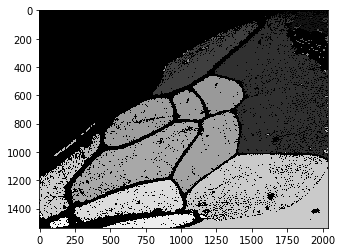

In [186]:
retval, markers = cv2.connectedComponents(opening)
plt.imshow(markers, cmap='gray')

## Watershed

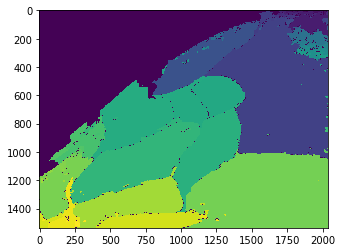

In [187]:
ws = cv2.watershed(img,markers)
plt.imshow(ws)

## Results

In [188]:
def process(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    retval, markers = cv2.connectedComponents(opening)
    ws = cv2.watershed(img,markers)
    return ws

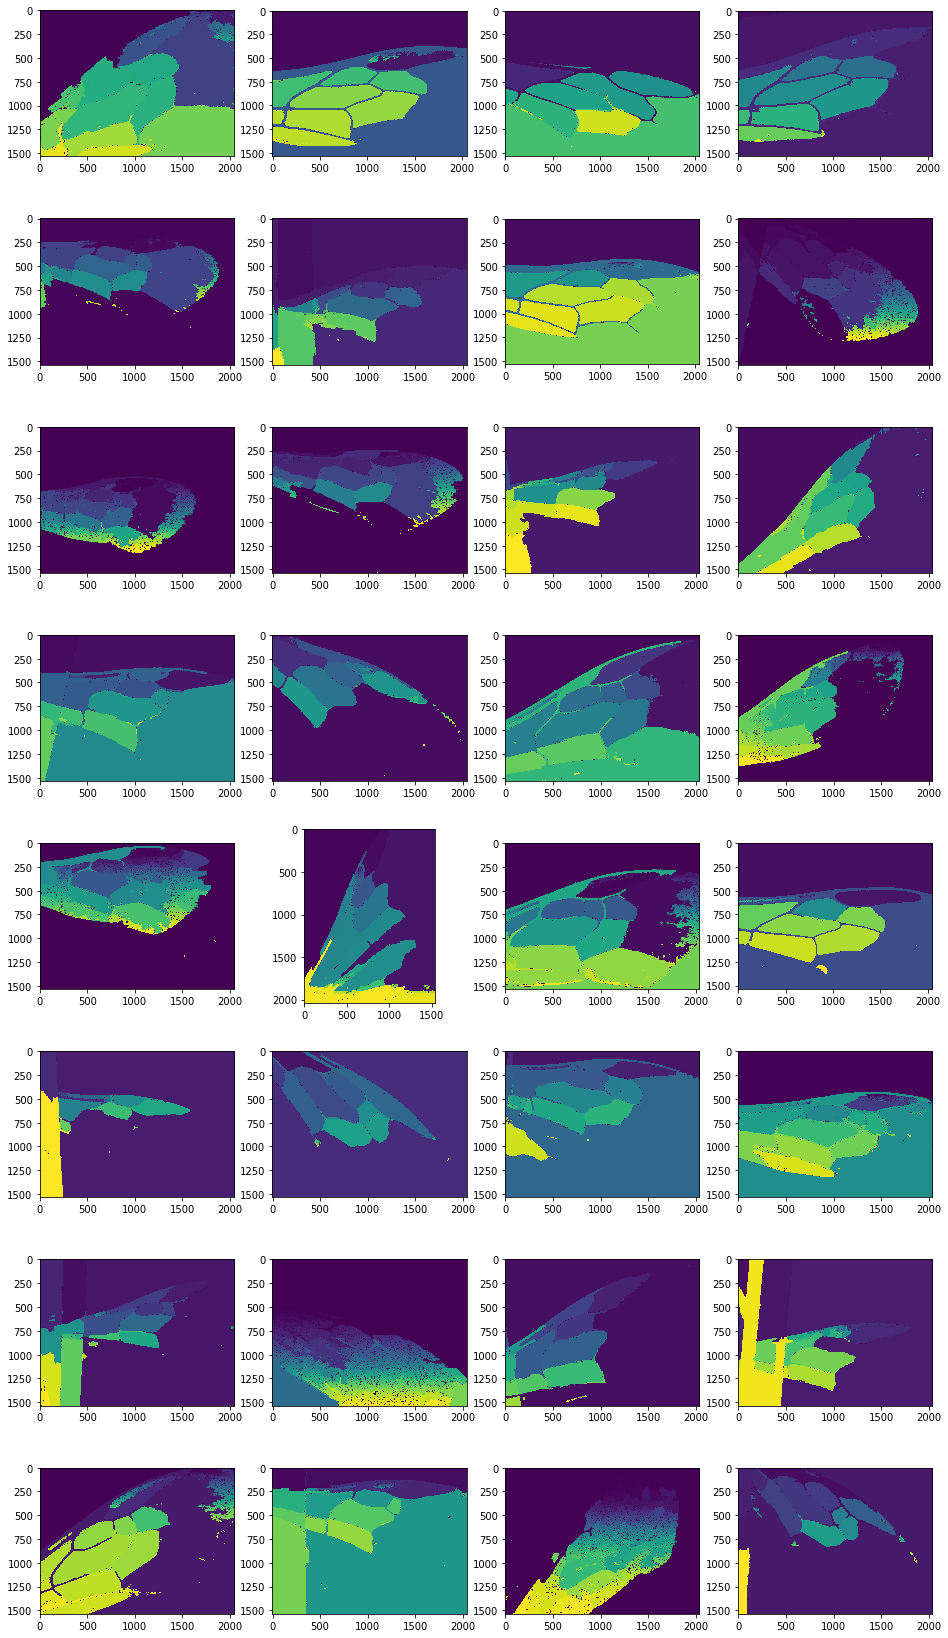

In [189]:
fig=plt.figure(figsize=(16, 30))
for i in range (0, 32):
    ws = process(train_imgs[i])
    fig.add_subplot(8, 4, i+1)
    plt.imshow(ws)
plt.show()